# Patience prose n-grams
Thursday, June 23, 2022

In this NB, I want to see what nlp is possible with the prose.

In [112]:
# import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt #will use to visualize the result of our n-gram ranking
import seaborn as sns

sns.set_style("white")

First, let's store the text of Patience as an object. To speed things up, I did some manual cleaning beforehand.

In [68]:
Patience_prose_raw = open("Patience_prose_raw2.txt", "r").read()
Patience_prose_raw

'Patience\n\nPatience is a virtue, though it may often displease. When sorrowful hearts are hurt by scorn or something else, long-suffering can assuage them and ease the pain, for she [i.e. patience] kills everything bad and extinguishes malice. For if anyone could endure  sorrow,  happiness  would  follow; and anyone who, through resentment, cannot endure suffers the more intensely. So it is better [for me] to put up with the blow from time to time, though this may be distasteful to me, than to give vent continually to my resentment. I heard on a holy day, at a solemn mass, how Matthew told that his Master taught His followers. [11] He decreed them eight beatitudes, and for each one a reward, severally, according to its merit, in a diverse manner: they are blessed who have  poverty at heart, for theirs  is the kingdom of heaven to keep for ever; they who practise meekness are also blessed, for they shall possess this world and have all their wishes; they are blessed also who weep for 

I want to do a bit more cleaning of punctuation and weird formatting.

In [135]:
# found this function for removing punctuation.
# tweaked it so that it doesn't remove spaces,
# but does remove some other junk and numerical digits

def remove_punc(string):
    punc = '''!()-[]{};:'"\,.<>/?@#$%^&*_~â€™˜1234567890'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string

In [136]:
Patience_nopunc = remove_punc(Patience_prose_raw)
Patience_nopunc

'Patience\n\nPatience is a virtue though it may often displease When sorrowful hearts are hurt by scorn or something else longsuffering can assuage them and ease the pain for she ie patience kills everything bad and extinguishes malice For if anyone could endure  sorrow  happiness  would  follow and anyone who through resentment cannot endure suffers the more intensely So it is better for me to put up with the blow from time to time though this may be distasteful to me than to give vent continually to my resentment I heard on a holy day at a solemn mass how Matthew told that his Master taught His followers  He decreed them eight beatitudes and for each one a reward severally according to its merit in a diverse manner they are blessed who have  poverty at heart for theirs  is the kingdom of heaven to keep for ever they who practise meekness are also blessed for they shall possess this world and have all their wishes they are blessed also who weep for their sin for they shall obtain comf

Now let me try to "stem" and "lemmatize" words into their base forms. Stemming removes plurals, gerunds, nounified/adjective endings, etc. Lemmatizing is a more sophisticated function that reduces dimensionality: e.g. chat, chatter, chatty, chatting, and chatbox would be lemmatized to the same thing.

In [173]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
Patience_stemmed = stemmer.stem(Patience_nopunc)
Patience_stemmed

'patience\n\npatience is a virtue though it may often displease when sorrowful hearts are hurt by scorn or something else longsuffering can assuage them and ease the pain for she ie patience kills everything bad and extinguishes malice for if anyone could endure  sorrow  happiness  would  follow and anyone who through resentment cannot endure suffers the more intensely so it is better for me to put up with the blow from time to time though this may be distasteful to me than to give vent continually to my resentment i heard on a holy day at a solemn mass how matthew told that his master taught his followers  he decreed them eight beatitudes and for each one a reward severally according to its merit in a diverse manner they are blessed who have  poverty at heart for theirs  is the kingdom of heaven to keep for ever they who practise meekness are also blessed for they shall possess this world and have all their wishes they are blessed also who weep for their sin for they shall obtain comf

In [174]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
Patience_lem = lemmatizer.lemmatize(Patience_stemmed)
Patience_lem

[nltk_data] Downloading package wordnet to C:\Users\Calvin
[nltk_data]     Gross\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'patience\n\npatience is a virtue though it may often displease when sorrowful hearts are hurt by scorn or something else longsuffering can assuage them and ease the pain for she ie patience kills everything bad and extinguishes malice for if anyone could endure  sorrow  happiness  would  follow and anyone who through resentment cannot endure suffers the more intensely so it is better for me to put up with the blow from time to time though this may be distasteful to me than to give vent continually to my resentment i heard on a holy day at a solemn mass how matthew told that his master taught his followers  he decreed them eight beatitudes and for each one a reward severally according to its merit in a diverse manner they are blessed who have  poverty at heart for theirs  is the kingdom of heaven to keep for ever they who practise meekness are also blessed for they shall possess this world and have all their wishes they are blessed also who weep for their sin for they shall obtain comf

Now I will "tokenize" the text into a string of individual words.

In [159]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
sentence = """Patience is a virtue, though it may often displease."""
sentence_tokens = tokenizer.tokenize(sentence)
len(sentence_tokens)

11

In [175]:
Patience_tokens = tokenizer.tokenize(Patience_lem)
len(Patience_tokens)

# len = 5452

5452

Now it's tokenized. Next, I want to get rid of common words, known as stopwords, as well as punctuation.

In [176]:
# let's start with getting rid of common "stop words." 
# I'll stick to nltk since it's what the book is using!

import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Calvin
[nltk_data]     Gross\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
len(stop_words)
stop_words[160:]

['ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [163]:
# let's try a brief example just to make sure my code works

sample_tokens = ['jergens', 'ate', 'my', 'sandwich', 'on', 'this', 'day']
filtered_sample = [x for x in sample_tokens if x not in stop_words]
print(filtered_sample)

['jergens', 'ate', 'sandwich', 'day']


In [177]:
# now let's try to filter stopwords with Patience, tokenized, punctuation removed

filtered_Patience = [x for x in Patience_tokens if x not in stop_words]
len(filtered_Patience)

# len = 2504 so it worked!

2504

In [178]:
# let's take a look

filtered_Patience

['patience',
 'patience',
 'virtue',
 'though',
 'may',
 'often',
 'displease',
 'sorrowful',
 'hearts',
 'hurt',
 'scorn',
 'something',
 'else',
 'longsuffering',
 'assuage',
 'ease',
 'pain',
 'ie',
 'patience',
 'kills',
 'everything',
 'bad',
 'extinguishes',
 'malice',
 'anyone',
 'could',
 'endure',
 'sorrow',
 'happiness',
 'would',
 'follow',
 'anyone',
 'resentment',
 'endure',
 'suffers',
 'intensely',
 'better',
 'put',
 'blow',
 'time',
 'time',
 'though',
 'may',
 'distasteful',
 'give',
 'vent',
 'continually',
 'resentment',
 'heard',
 'holy',
 'day',
 'solemn',
 'mass',
 'matthew',
 'told',
 'master',
 'taught',
 'followers',
 'decreed',
 'eight',
 'beatitudes',
 'one',
 'reward',
 'severally',
 'according',
 'merit',
 'diverse',
 'manner',
 'blessed',
 'poverty',
 'heart',
 'kingdom',
 'heaven',
 'keep',
 'ever',
 'practise',
 'meekness',
 'also',
 'blessed',
 'shall',
 'possess',
 'world',
 'wishes',
 'blessed',
 'also',
 'weep',
 'sin',
 'shall',
 'obtain',
 'comfor

Now that we have a "basic" text let's try building some ngrams just to see what happens!!

In [179]:
from nltk.util import ngrams
list(ngrams(sentence_tokens, 2))

[('Patience', 'is'),
 ('is', 'a'),
 ('a', 'virtue'),
 ('virtue', ','),
 (',', 'though'),
 ('though', 'it'),
 ('it', 'may'),
 ('may', 'often'),
 ('often', 'displease'),
 ('displease', '.')]

In [180]:
list(ngrams(filtered_Patience, 2))

[('patience', 'patience'),
 ('patience', 'virtue'),
 ('virtue', 'though'),
 ('though', 'may'),
 ('may', 'often'),
 ('often', 'displease'),
 ('displease', 'sorrowful'),
 ('sorrowful', 'hearts'),
 ('hearts', 'hurt'),
 ('hurt', 'scorn'),
 ('scorn', 'something'),
 ('something', 'else'),
 ('else', 'longsuffering'),
 ('longsuffering', 'assuage'),
 ('assuage', 'ease'),
 ('ease', 'pain'),
 ('pain', 'ie'),
 ('ie', 'patience'),
 ('patience', 'kills'),
 ('kills', 'everything'),
 ('everything', 'bad'),
 ('bad', 'extinguishes'),
 ('extinguishes', 'malice'),
 ('malice', 'anyone'),
 ('anyone', 'could'),
 ('could', 'endure'),
 ('endure', 'sorrow'),
 ('sorrow', 'happiness'),
 ('happiness', 'would'),
 ('would', 'follow'),
 ('follow', 'anyone'),
 ('anyone', 'resentment'),
 ('resentment', 'endure'),
 ('endure', 'suffers'),
 ('suffers', 'intensely'),
 ('intensely', 'better'),
 ('better', 'put'),
 ('put', 'blow'),
 ('blow', 'time'),
 ('time', 'time'),
 ('time', 'though'),
 ('though', 'may'),
 ('may', 'dista

In [181]:
top_bigrams = pd.Series(nltk.ngrams(filtered_Patience, 2)).value_counts()[:20]
top_bigrams

(blessed, also)      6
(become, angry)      3
(though, may)        3
(ie, jonah)          3
(man, ever)          3
(man, awoke)         3
(bright, sun)        3
(man, could)         2
(said, man)          2
(knew, well)         2
(upbraids, man)      2
(solemn, vows)       2
(gracious, lord)     2
(man, man)           2
(many, rough)        2
(kingdom, heaven)    2
(go, way)            2
(evil, deeds)        2
(taken, nineveh)     2
(sea, ship)          2
dtype: int64

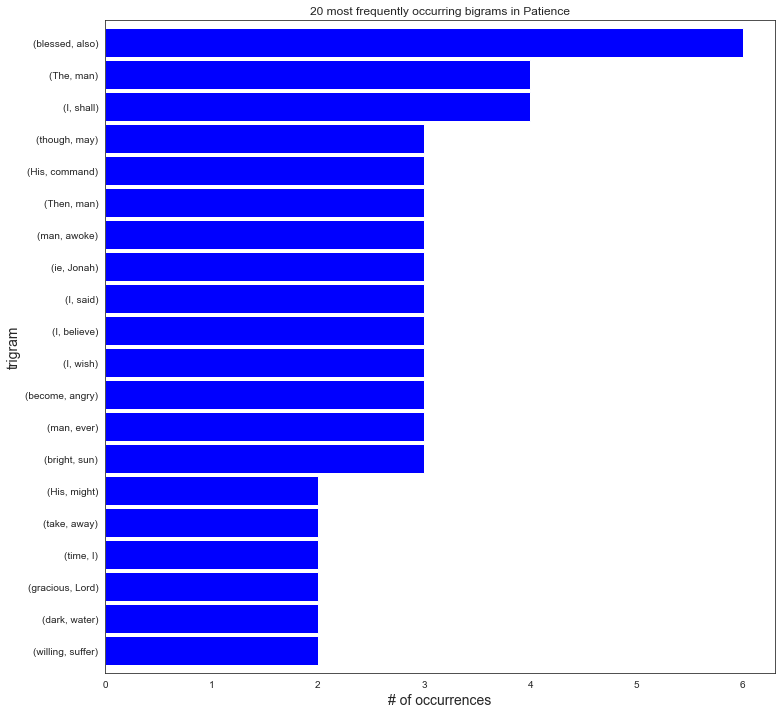

In [169]:
top_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 12))

plt.xlabel('# of occurrences', fontsize = 14)
plt.ylabel('trigram', fontsize = 14)
plt.title('20 most frequently occurring bigrams in Patience')
plt.show()

In [182]:
top_trigrams = pd.Series(nltk.ngrams(filtered_Patience, 3)).value_counts()[:12]
top_trigrams

(may, often, displease)      2
(virtue, though, may)        2
(man, ever, knew)            2
(though, may, often)         2
(upon, dark, waters)         2
(sits, says, throne)         1
(drink, cold, water)         1
(yes, indeed, lord)          1
(green, leaves, wind)        1
(haul, guyropes, big)        1
(beasts, women, children)    1
(god, destroy, place)        1
dtype: int64

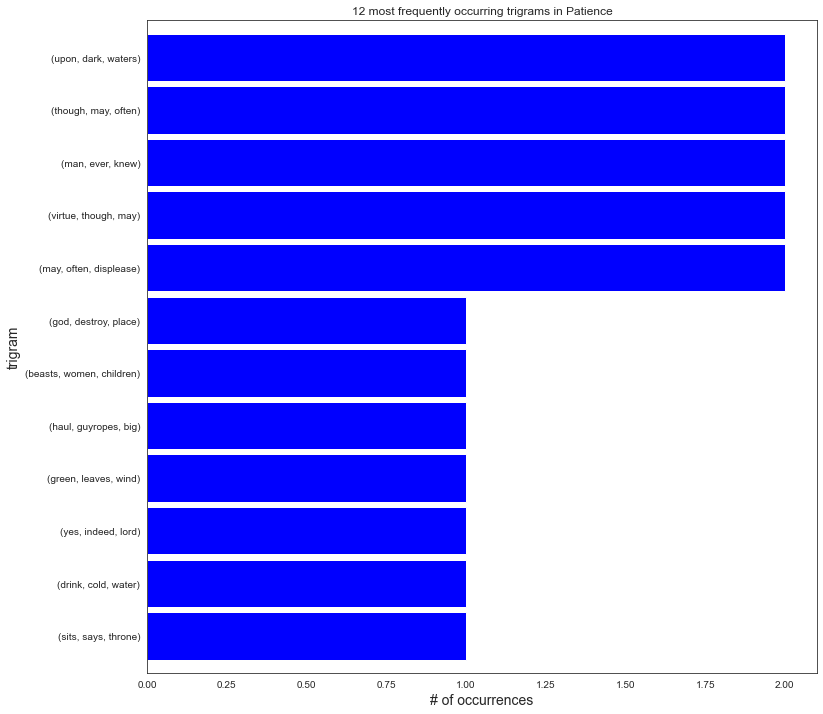

In [183]:
top_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 12))

plt.xlabel('# of occurrences', fontsize = 14)
plt.ylabel('trigram', fontsize = 14)
plt.title('12 most frequently occurring trigrams in Patience')
plt.show()

Ok well that wasn't terribly illuminating unfortunately but it was a fun attempt! At least I was able to figure out how to do some basic cleaning.